In [1]:
# We are creating a dataset which is based on all of the dual-task trials per block and we are ignoring the practice trials
# The dataset is built by merging the results acquired in the paper created by Chris (---link---)

# Some columns are based on the significance provided in the said paper ( & maybe image here)
# The csv files we are merging into our dataset are provided below


# 

# -MaxDeviationPerTrial.csv
# -maxnrDigitEnteredPerPPAndPerBlockPerTrial.csv
# -numberOfVisitsTrackerPerParticipantPerBlock.csv (trial data)
# samplesOutsideTrial.csv(*)
# sdVisTime.csv(*)
# tableForMeanTimeInDigitPerPPandPerBlock.csv(*) - merge the data ber block maybe?

# We are using the payoff function values provided in the meanVisTime.csv file
# The columns marked with star could be significant and we are testing to see the results with or without the said feature

In [17]:
# We first read the data and display it
final_rows = []

import pandas as pd
data = pd.read_csv('./data.csv');

display('loaded data!')

'loaded data!'

In [18]:
# We first split the data into 8 datasets
# and we calculate the mean value for each of the dataset
# in order to see how biased the data is in terms of 
# Radius, Noise and the payoff function

split_on = ['PayOffFunctionNumeric','Radius','Noise']

def split(dataSets,col):
    
    s = []
    
    for data in dataSets:
        
        if(col >= len(split_on)):
            return None
        
        values = {}
        
        for row in range(0,data.shape[ 0 ]):
            splitColumn = split_on[ col ]

            rowValue = data.iloc[ row ][ splitColumn ]
            
            if not rowValue in values:
                values[ rowValue ] = [ ]
                
            values[ rowValue ].append(row)
            
        for value in values:
            
            nextSet = []
            
            for row in values[value]:
                nextSet.append(data.iloc[ row ])
                
            s.append(pd.DataFrame(nextSet))
            
        
    res = split( s , col + 1 )
    
    if res is None:
        return s
    else: 
        return res
    
sets = [data]

split_sets = split(sets,0)

print('resulting length : ' +  str(len(split_sets)))

resulting length : 8


In [4]:
#We then take the top N percent of each of the sets

def get_by_split(sets,start, step, end, func):
    while start <= end:
        for dataSet in sets:
            sorted_set = dataSet.sort_values('Score',ascending=[False])
            func(start,sorted_set)
        start = start + step

per_tick = {}

#We then compute the mean for the score column for the provided dataset
def mean(current_tick,item):

    meanVal = item['Score'].mean()
    
    if current_tick not in per_tick:
        per_tick[current_tick]= []
        
    per_tick[current_tick].append(meanVal)

get_by_split(split_sets, 1, 0.05, 1,mean)

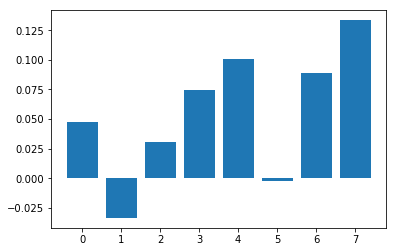

In [19]:
# We can now measure the distributions
# by testing different sizes

import matplotlib.pyplot as plt
import numpy as np

for tick_size in per_tick:
    tick_marks = np.arange(len(per_tick[tick_size]))
    fig, ax = plt.subplots()
    plt.bar(tick_marks,per_tick[tick_size])
    plt.show()

In [27]:
# Then we split the data into training and testing sets by using the train test split function
from sklearn.model_selection import train_test_split

# Percentage of 
test = 0.25

y = data['Score']
X = data.drop('Score',1)

#We split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test)
print()
display('Finished train test split')

'Finished train test split'

In [24]:
from sklearn.svm import SVR
from sklearn.tree import tree

# here be les dragons
sv = SVR()
tr = tree.DecisionTreeRegressor()

print('Initialized algorithms')

Initialized algorithms


In [25]:
# Using grid search CV to tweak parameters
# We define a hyper parameter

from sklearn.model_selection import GridSearchCV

dict_grid = {
    sv: [
            {
                'C': [1, 10, 100, 1000], 
                'kernel' : ['linear']
            },
            {
                'C': [1, 10, 100, 1000], 
                'gamma': [0.001, 0.0001], 
                'kernel': ['rbf']
            }
    ],
    tr : [
            {
                #TODO:...
            }
    ]
}

In [26]:
from sklearn.svm import SVR
from sklearn import tree

from numpy import *

algorithms = [sv,tr]

scores = ['R2']

print('shuffling .. ')

X_shuff = numpy.random.shuffle( X_train )

print(X_shuff)

for score in scores:
    display("# Tuning hyper-parameters for %s" % score)
    for algorithm in algorithms:
        display('------Starting a new grid search CV fitting with model--------')
        display('Fitting with model : ' + str(algorithm))
        clf = GridSearchCV(algorithm, dict_grid[algorithm], scoring = '%s_weighted' % score)

        clf.fit( X_train, y_train )
        
display('Finished training')

shuffling .. 


KeyError: 146